# **Waze Project**

# **Exploratory Data Analysis**

As mentioned in the 'About Project' file, our main target is to help prevent churned users. So I can answer some questions like: 'Who are the users most likely to churn? Why do users churn? When do users churn?' at the end of this activity. 
In this file, the exploratory data analysis (EDA) process contains: 
- Part 1: Imports, links, and loading
- Part 2: Data Exploration
- Part 3: Building visualizations
- Part 4: Evaluating and sharing results

## Part 1: Imports, links, and loading

In [2]:
#import packages and librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load the cleaned dataset
df = pd.read_csv('data/waze_dataset_cleaned.csv')
df['ID'] = df['ID'].astype(object)

## Part 2: Data Exploration

#### **Data overview and summary statistics**

First, I will have a overview of the data and it's statistics using some method, so I can refer back to if needed.

In [22]:
### YOUR CODE HERE ###
df.head()

ID     label  sessions  drives  total_sessions  n_days_after_onboarding  \
0  0  retained       283     226      296.748273                     2276   
1  1  retained       133     107      326.896596                     1225   
2  2  retained       114      95      135.522926                     2651   
3  3  retained        49      40       67.589221                       15   
4  4  retained        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days   device  \
0              1985.775061             28            19  Android   
1              3160.472914             13            11   iPhone   
2              1610.735904             14             8  Android   
3               587.196542              7             3   iPhone   
4              1219.555924             27            18  Android   

   percent_sessions_in_last_month  
0                        0.953670  
1                        0.406856  
2                        0.841186  
3                        0.724968  
4                        0.499266

In [23]:
### YOUR CODE HERE ###
print(df.size)

200186


And summary information using the `info()` method.

In [24]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14299 non-null  object 
 1   label                           14299 non-null  object 
 2   sessions                        14299 non-null  int64  
 3   drives                          14299 non-null  int64  
 4   total_sessions                  14299 non-null  float64
 5   n_days_after_onboarding         14299 non-null  int64  
 6   total_navigations_fav1          14299 non-null  int64  
 7   total_navigations_fav2          14299 non-null  int64  
 8   driven_km_drives                14299 non-null  float64
 9   duration_minutes_drives         14299 non-null  float64
 10  activity_days                   14299 non-null  int64  
 11  driving_days                    14299 non-null  int64  
 12  device                          

Generate summary statistics using the `describe()` method.

In [25]:
### YOUR CODE HERE ###
df.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14299.000000  14299.000000    14299.000000             14299.000000   
mean      80.623820     67.255822      189.547409              1751.822505   
std       80.736502     65.947295      136.189764              1008.663834   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.457733               878.500000   
50%       56.000000     48.000000      158.718571              1749.000000   
75%      111.000000     93.000000      253.540450              2627.500000   
max      743.000000    596.000000     1216.154633              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14299.000000            14299.000000      14299.000000   
mean               121.747395               29.638296       4044.401535   
std                147.713428               45.350890       2504.977970   
min                  0.000000                0.000000         60.441250   
25%                 10.000000                0.000000       2217.319909   
50%                 71.000000                9.000000       3496.545617   
75%                178.000000               43.000000       5299.972162   
max               1236.000000              415.000000      21183.401890   

       duration_minutes_drives  activity_days  driving_days  \
count             14299.000000   14299.000000  14299.000000   
mean               1864.199794      15.544653     12.182530   
std                1448.005047       9.016088      7.833835   
min                  18.282082       0.000000      0.000000   
25%                 840.181344       8.000000      5.000000   
50%                1479.394387      16.000000     12.000000   
75%                2466.928876      23.000000     19.000000   
max               15851.727160      31.000000     30.000000   

       percent_sessions_in_last_month  
count                    14299.000000  
mean                         0.449837  
std                          0.286863  
min                          0.000000  
25%                          0.196890  
50%                          0.424310  
75%                          0.687251  
max                          1.530637

### **Univariate Analysis**

First, I will see how the distribution is from each variable.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

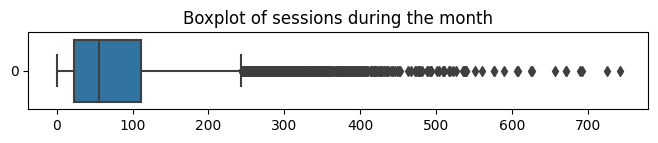

In [26]:
# Box plot
plt.figure(figsize = (8,1))
b = sns.boxplot(
    df['sessions'], 
    orient = 'h'
);
plt.title('Boxplot of sessions during the month')
plt.show()

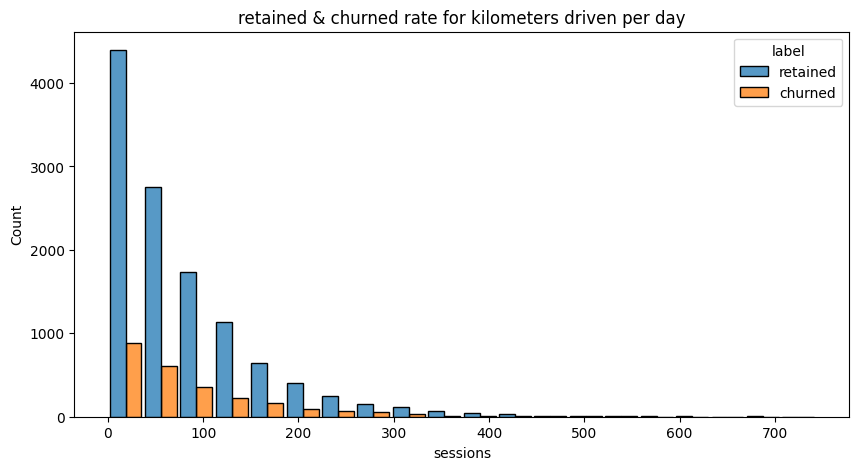

In [27]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'sessions', hue = 'label', 
             bins = 20, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('retained & churned rate for kilometers driven per day')
plt.show()

The `sessions` variable is a right-skewed distribution with most of the users have less than 110 sessions. And the maximum values are even larger than 700. 

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

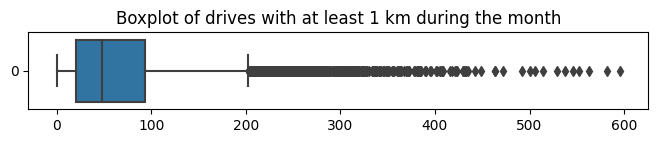

In [28]:
# Box plot
plt.figure(figsize = (8,1))
b = sns.boxplot(df['drives'], orient = 'h');
plt.title('Boxplot of drives with at least 1 km during the month')
plt.show()

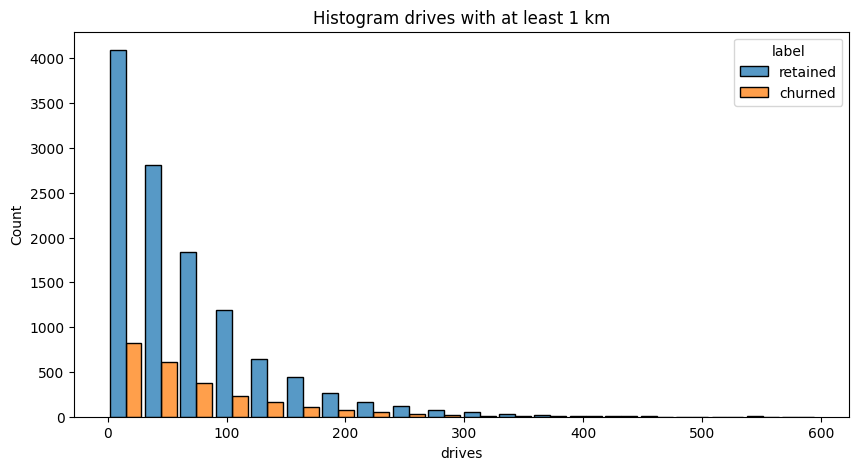

In [29]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'drives', hue = 'label', 
             bins = 20, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('Histogram drives with at least 1 km')
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 300 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

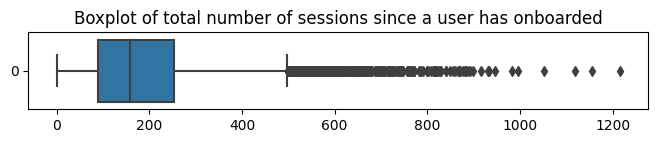

In [30]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize = (8,1))
b = sns.boxplot(df['total_sessions'], orient = 'h');
plt.title('Boxplot of total number of sessions since a user has onboarded')
plt.show()

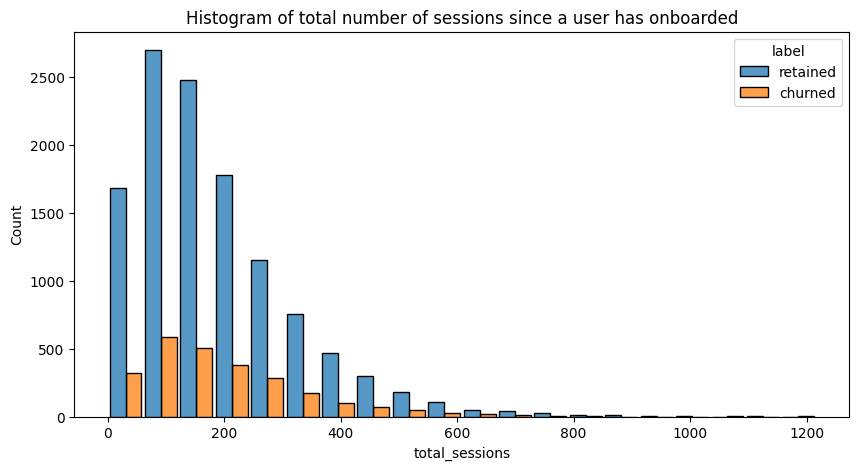

In [31]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'total_sessions', hue = 'label', 
             bins = 20, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('Histogram of total number of sessions since a user has onboarded')
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

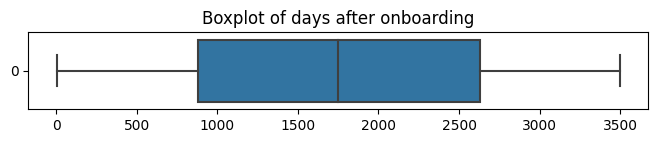

In [32]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize = (8,1))
b = sns.boxplot(df['n_days_after_onboarding'], orient = 'h');
plt.title('Boxplot of days after onboarding')
plt.show()

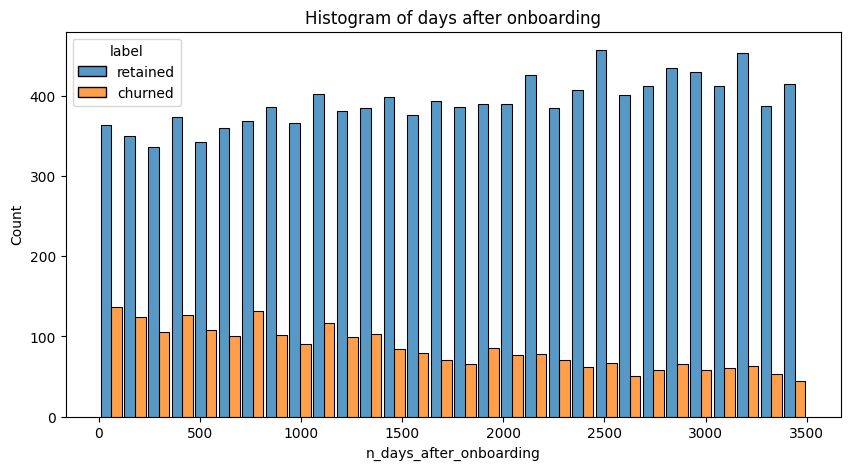

In [33]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'n_days_after_onboarding', hue = 'label', 
             bins = 30, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('Histogram of days after onboarding')
plt.show()

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years). The users that are onboard longer are tend to stick longer with the app, maybe for new users, they have more options when choosing alternative apps, or our app have to change something too since the new users are not as many as it used to be, and the retension rate is also worse so we need to find a solution to improve this. 

#### **`driven_km_drives`**

_Total kilometers driven during the month_

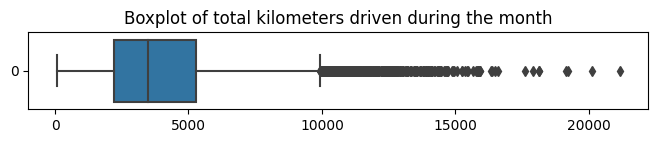

In [34]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize = (8,1))
b = sns.boxplot(df['driven_km_drives'], orient = 'h');
plt.title('Boxplot of total kilometers driven during the month')
plt.show()

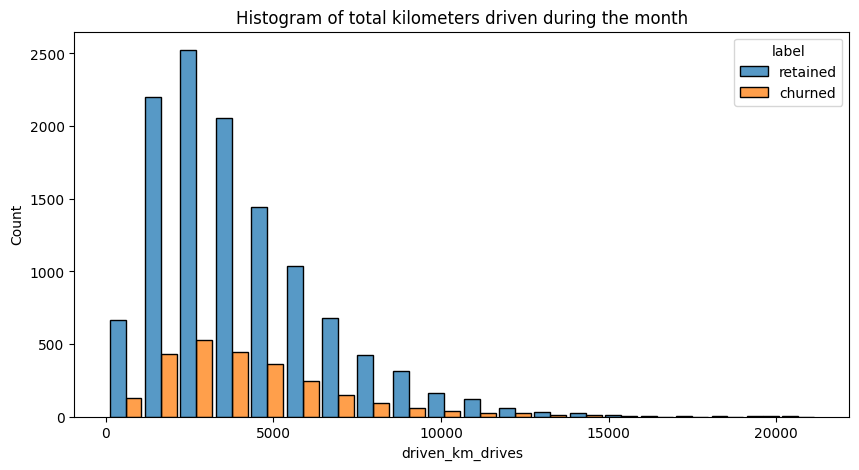

In [35]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'driven_km_drives', hue = 'label', bins = 20, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('Histogram of total kilometers driven during the month')
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

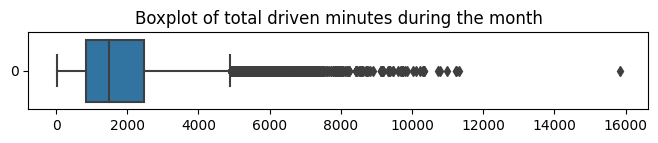

In [36]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize = (8,1))
b = sns.boxplot(df['duration_minutes_drives'], orient = 'h');
plt.title('Boxplot of total driven minutes during the month')
plt.show()

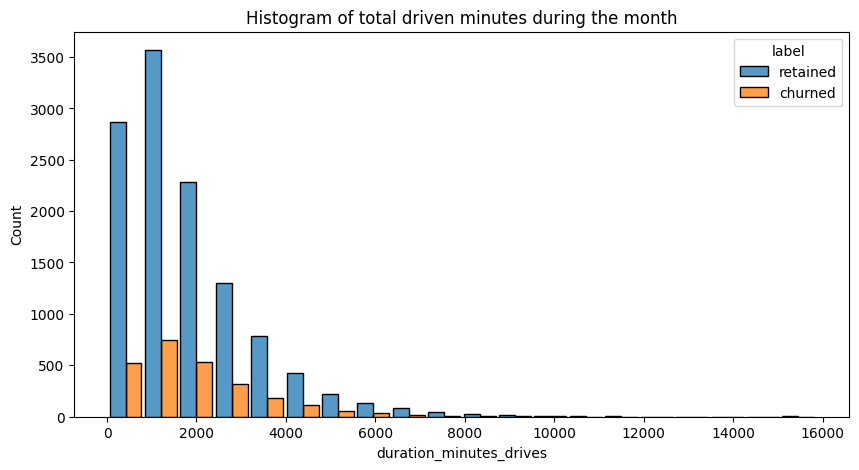

In [37]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'duration_minutes_drives', hue = 'label', 
             bins = 20, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('Histogram of total driven minutes during the month')
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

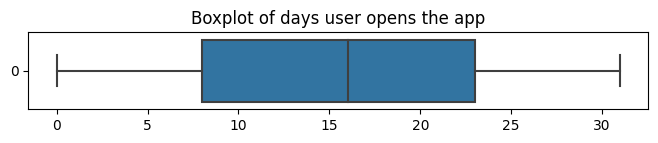

In [38]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize = (8,1))
b = sns.boxplot(df['activity_days'], orient = 'h');
plt.title('Boxplot of days user opens the app')
plt.show()

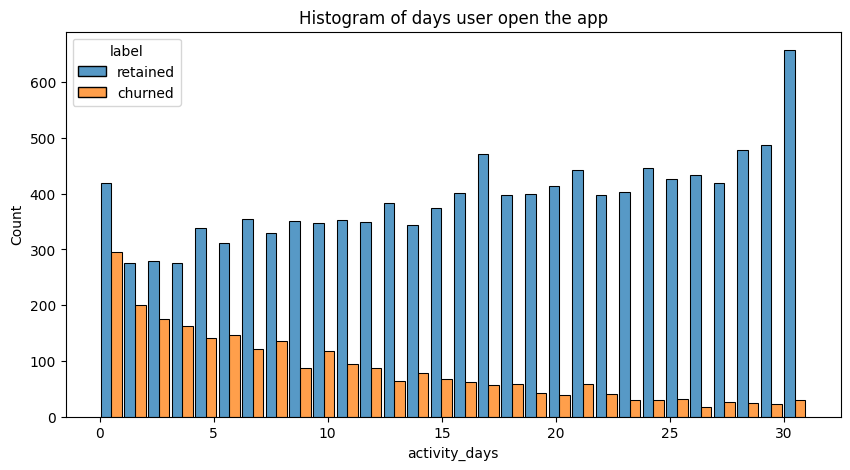

In [39]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'activity_days', hue = 'label', bins = 30, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('Histogram of days user open the app')
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~700 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

The distribution of activity days of churned users are right-skewed.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

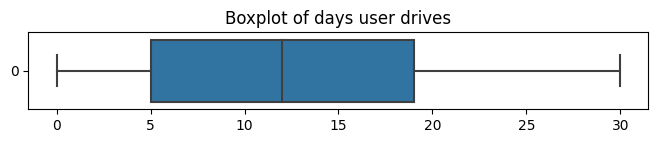

In [40]:
# Box plot
### YOUR CODE HERE ###
plt.figure(figsize = (8,1))
b = sns.boxplot(df['driving_days'], orient = 'h');
plt.title('Boxplot of days user drives')
plt.show()

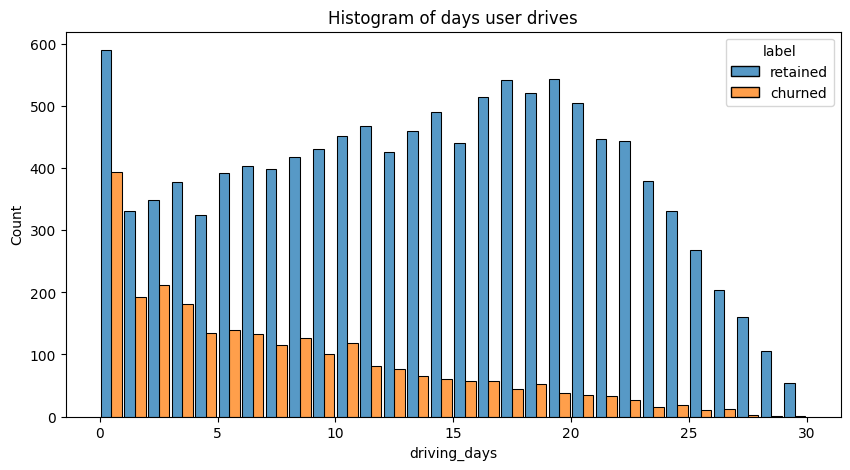

In [41]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'driving_days', hue = 'label', bins = 30, palette='tab10', multiple='dodge', shrink =0.9)
plt.title('Histogram of days user drives')
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

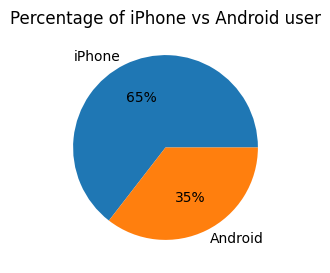

In [42]:
# Pie chart
### YOUR CODE HERE ###
plt.figure(figsize = (8,3))
device_count = df['device'].value_counts() 
plt.pie(device_count, labels = device_count.index, autopct='%.0f%%') 
plt.title('Percentage of iPhone vs Android user')  
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

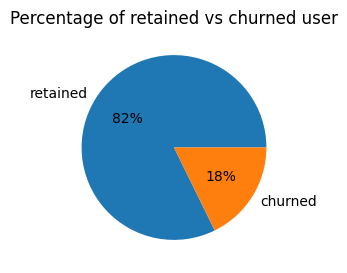

In [43]:
# Pie chart
### YOUR CODE HERE ###
plt.figure(figsize = (8,3))
label_count = df['label'].value_counts() 
plt.pie(label_count, labels = label_count.index, autopct='%.0f%%') 
plt.title('Percentage of retained vs churned user')  
plt.show()

Less than 18% of the users churned. This can be considered a good rate, but we must examine these churned users further. 

**So there are some noticable points:**

Some variables like sessions drives, total-sessions, driven-km-drives and duration minutes drives have right-skewed distribution and their outliers stay as large numbers. So there may be a possible correlation between these variables, we'll examine these variables further. n_days_after_onboarding, activity_days and driving_days have uniform distribution but the distribution of the churned users are right_skewed. So there maybe a relationship between a activity_days and driving_days.

### **Bivariate Analysis**

Now we'll see if there is any relationship between variables. We'll choose the numerical columns first. 

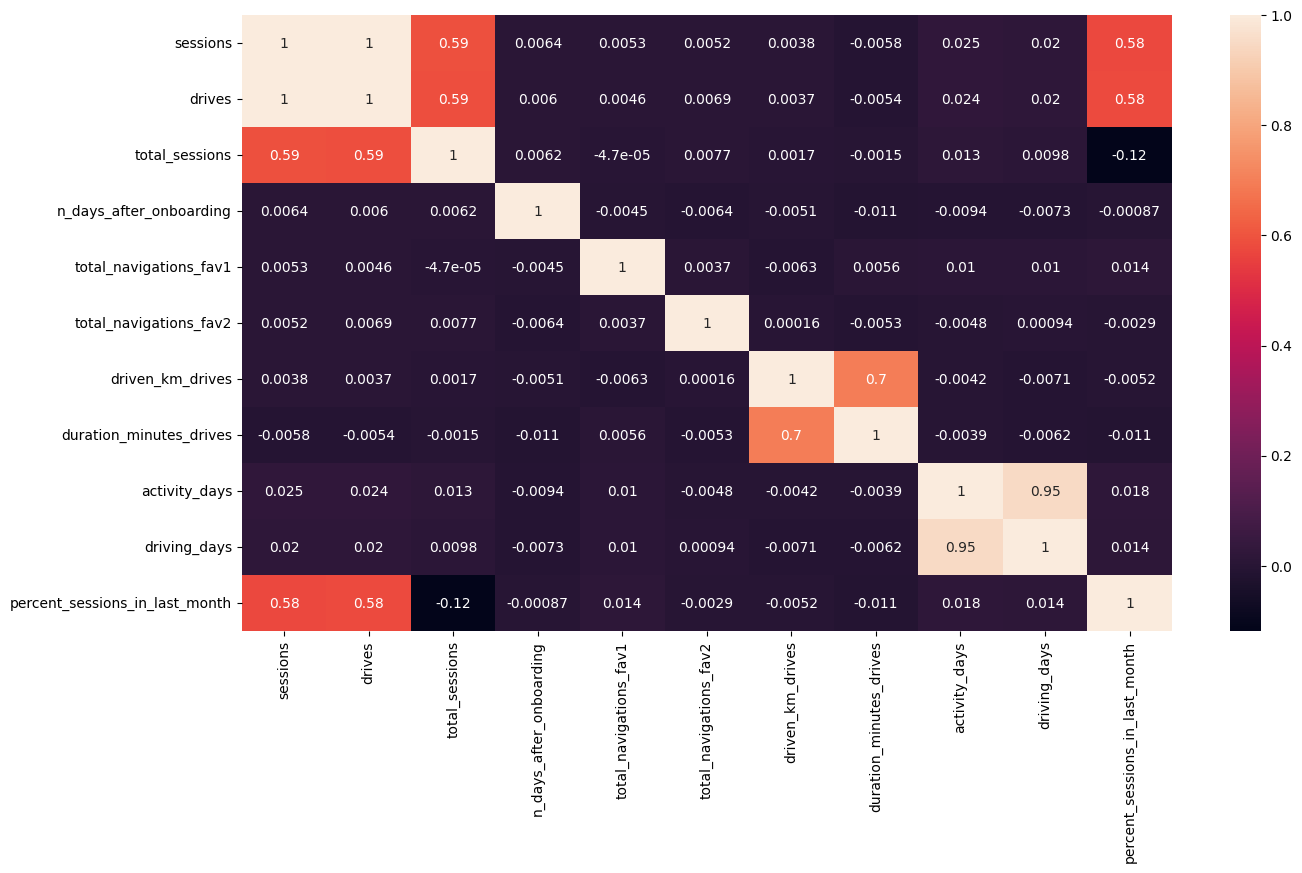

In [44]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

plt.show()

We can see a strong relationships between some pairs: `sessions - drives`, `activity_days - driving_days`; And some pairs are moderately correlated: 'driven_km_drives - duration_minutes_drives', 'total_sessions - sessions', 'total_sessions - drives'. 

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

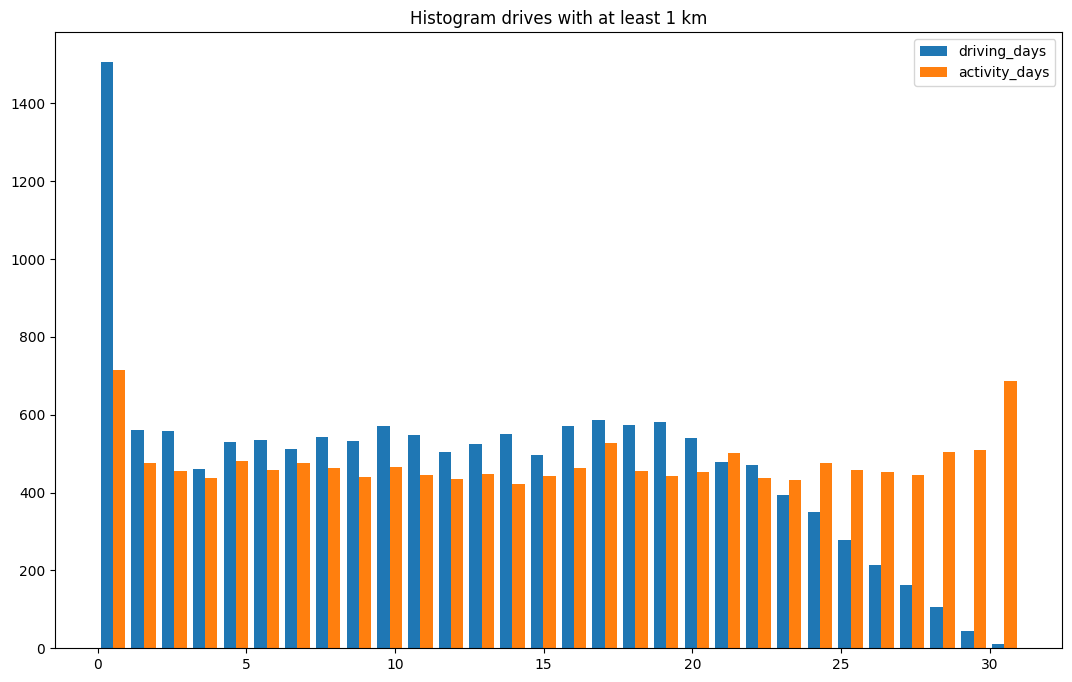

In [45]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (13,8))
plt.hist([df['driving_days'], df['activity_days']], label = ['driving_days', 'activity_days'], bins = 30)
plt.title('Histogram drives with at least 1 km')
plt.legend()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [46]:
### YOUR CODE HERE ###
print('driving days: ', max(df.driving_days))
print('activity_days: ', max(df.activity_days))

driving days:  30
activity_days:  31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

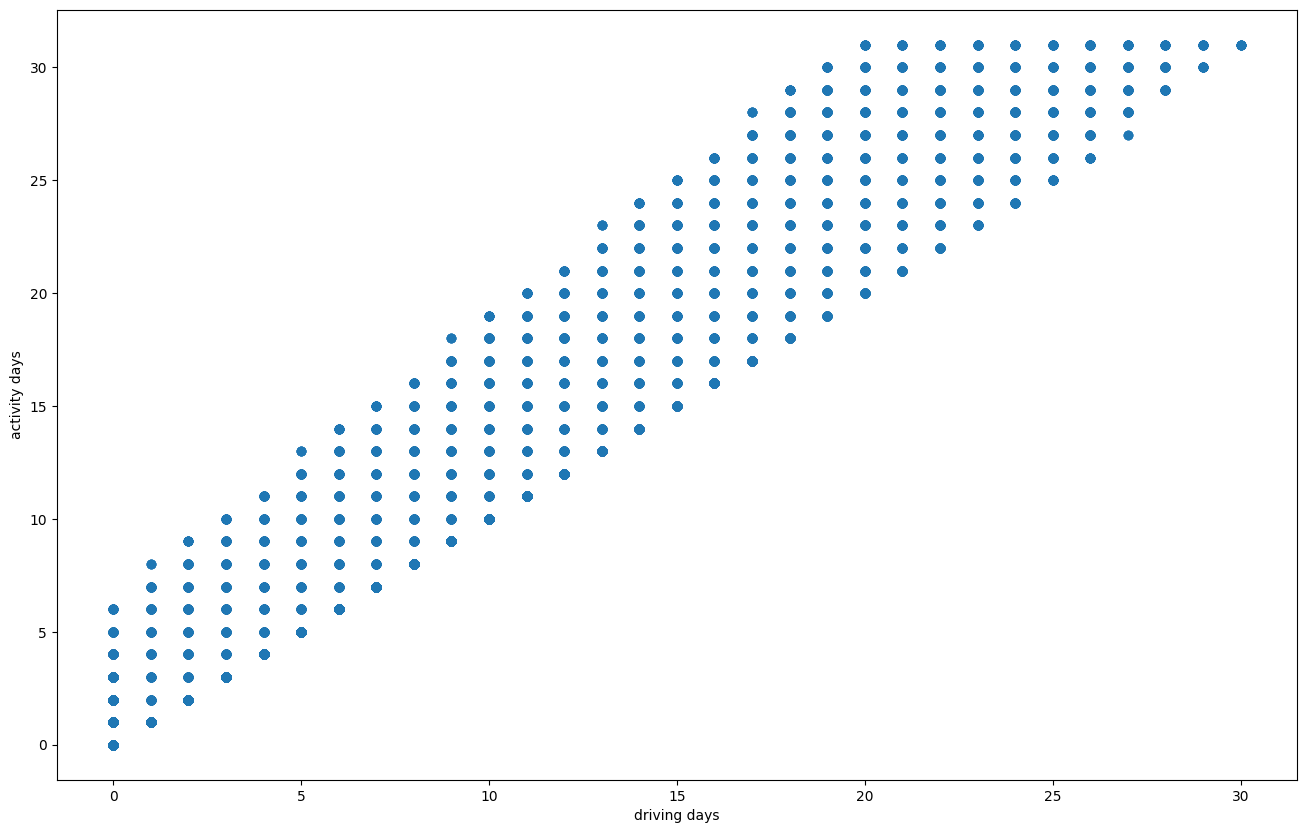

In [47]:
# Scatter plot
### YOUR CODE HERE ###
plt.figure(figsize = (16,10))
plt.scatter(df['driving_days'], df['activity_days'])
plt.xlabel('driving days')
plt.ylabel('activity days')
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

### Churn rate by favourite navigation

Now we'll check if the favourite navigations affect churn rate. We'll need to create a new categorical variable.

In [14]:
# combine 2 variables for seeking user's favourite place
df['total_navigations_2_fav'] = df['total_navigations_fav1'] + df['total_navigations_fav2']
df['total_navigations_2_fav'].describe()

count    14299.000000
mean       151.385691
std        154.680293
min          0.000000
25%         38.000000
50%        106.000000
75%        217.000000
max       1267.000000
Name: total_navigations_2_fav, dtype: float64

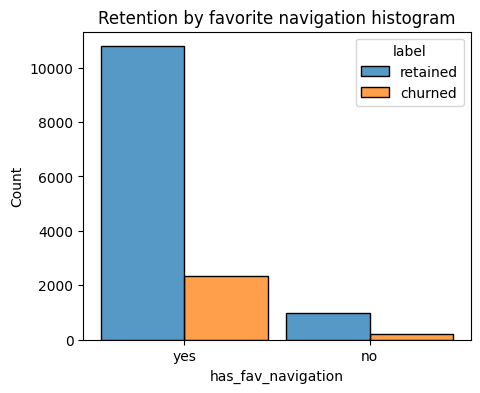

In [18]:
# create new categorical column present whether or not the user have a favorite navigation place
df['has_fav_navigation'] = df['total_navigations_2_fav'].apply(lambda x: 'yes' if x > 0 else 'no')
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='has_fav_navigation',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by favorite navigation histogram');

As we can see here, there is minor difference of churn rate between users who have favorite navigations vs users who don't have navigation. So we can consider the favorite navigation doesn't really affect churn rate.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

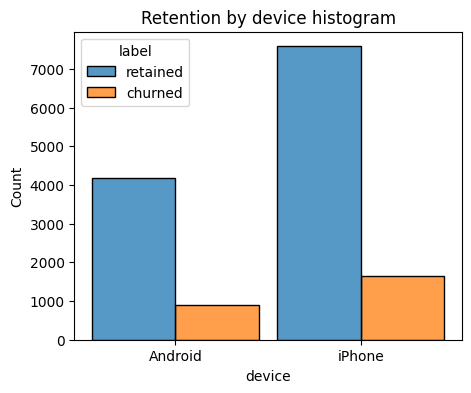

In [48]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types. So the users churn rate does not depend on the type of device. 

#### **Retention by kilometers driven per driving day**

Now we'll examine how the users who churned drive each day vs users who didn't churn.

In [49]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [50]:
# 1. Convert infinite values to zero
### YOUR CODE HERE ###
df['km_per_driving_day'] = df['km_per_driving_day'].where(df['km_per_driving_day'] != np.inf, 0)
# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

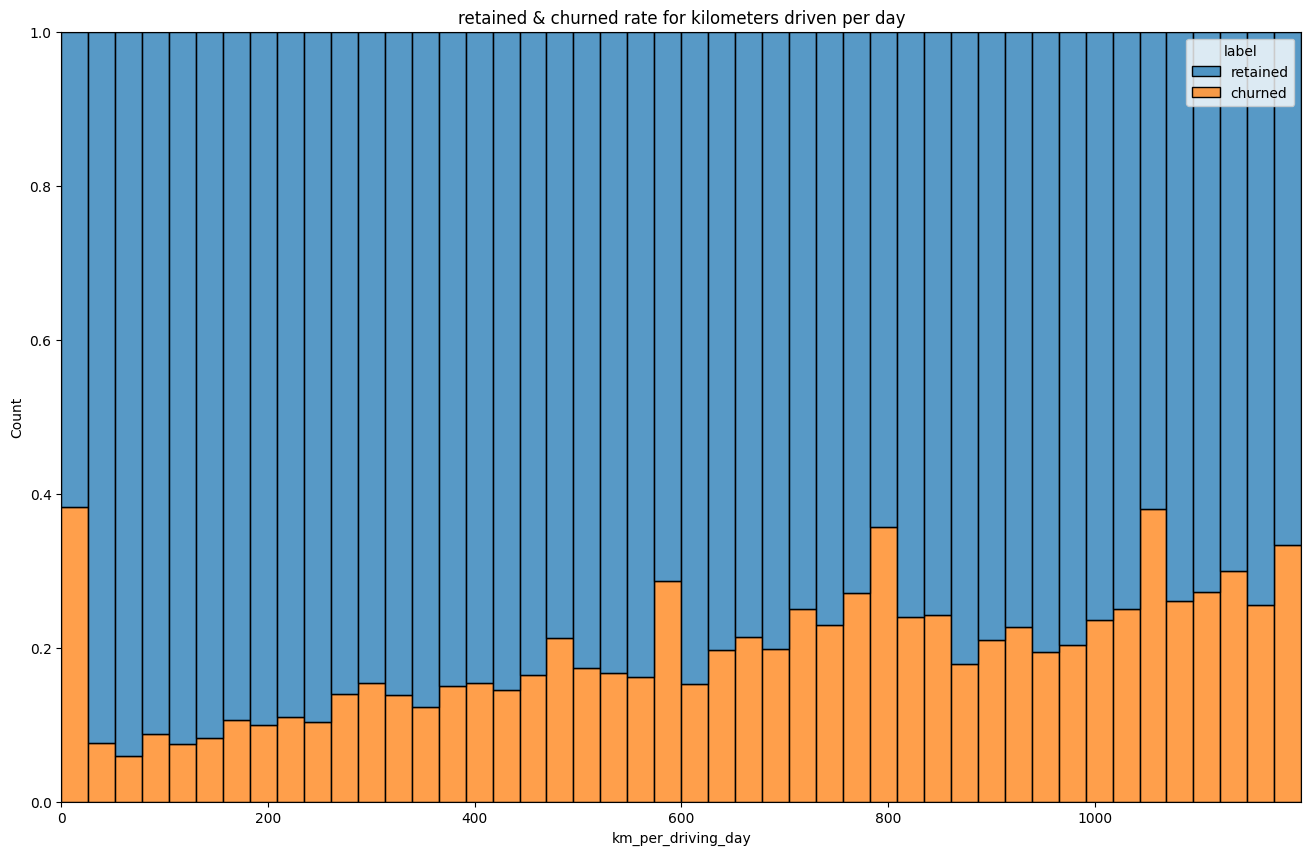

In [51]:
# Histogram
plt.figure(figsize = (16,10))
sns.histplot(data = df[df['km_per_driving_day'] <= 1200], 
             x = 'km_per_driving_day',
             hue = 'label',
             multiple = 'fill')
plt.title('retained & churned rate for kilometers driven per day')
plt.show()

The churn rate tends to increase as the mean daily distance driven increases. It would be worth investigating further the reasons for long-distance users to discontinue using the app, and the users who didn't drive at all during the month also hold a high churn rate, these users maybe just opened the app for check and didn't really use it. 

#### **Churn rate per number of driving days**

Now we'll check the churn rate for each number of driving days.

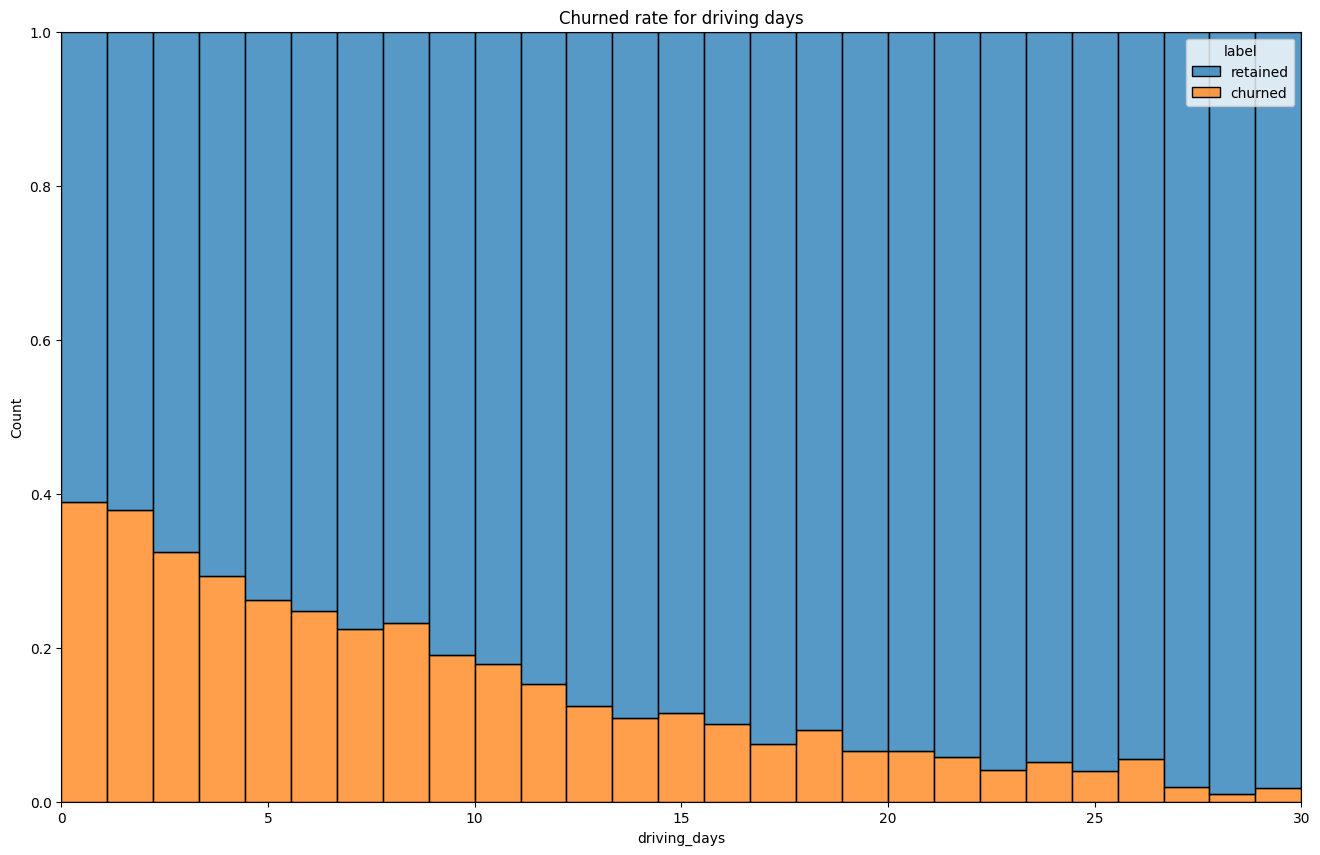

In [52]:
# Histogram
plt.figure(figsize = (16,10))
sns.histplot(data = df, 
             x = 'driving_days',
             hue = 'label',
             multiple = 'fill')
plt.title('Churned rate for driving days')
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

### Churn rate by velocity

Now we'll examine the velocity of users to see if there're any noticeable differences.

In [4]:
# calculate the velocity of each users in last month. Unit: kilometer/hour
df['velocity'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)

df['velocity'].describe()

count    14299.000000
mean       190.730963
std        339.926138
min         72.013095
25%         90.649402
50%        122.105845
75%        193.238449
max      23642.920871
Name: velocity, dtype: float64

There's no infinite values in this data set as max isn't equal to inf. But the speed of these drivers seem to be too high, even the minimum speed is 72 km/h. So there maybe a mistake of the app measuring distance or time -> we need to examine on this further. 

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [53]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [54]:
### YOUR CODE HERE ###
df['percent_sessions_in_last_month'].median()

0.4243102549137284

Now, create a histogram depicting the distribution of values in this new column.

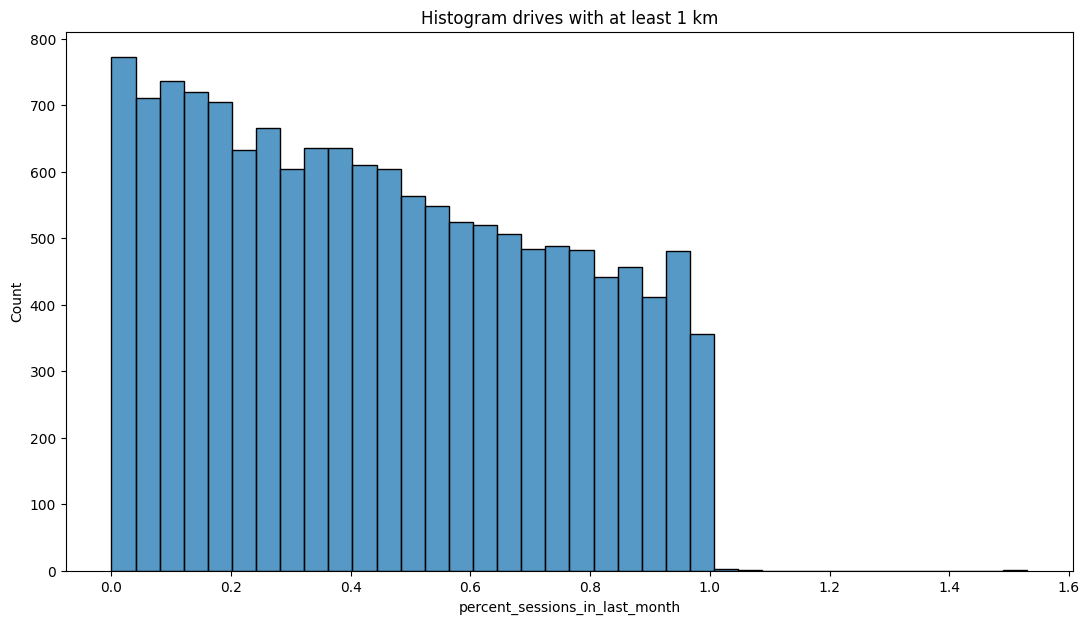

In [55]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (13,7))
sns.histplot(data = df, 
             x = 'percent_sessions_in_last_month')
plt.title('Histogram drives with at least 1 km')
plt.show()

Check the median value of the `n_days_after_onboarding` variable.

In [56]:
print(df['n_days_after_onboarding'].median())

1749.0


Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

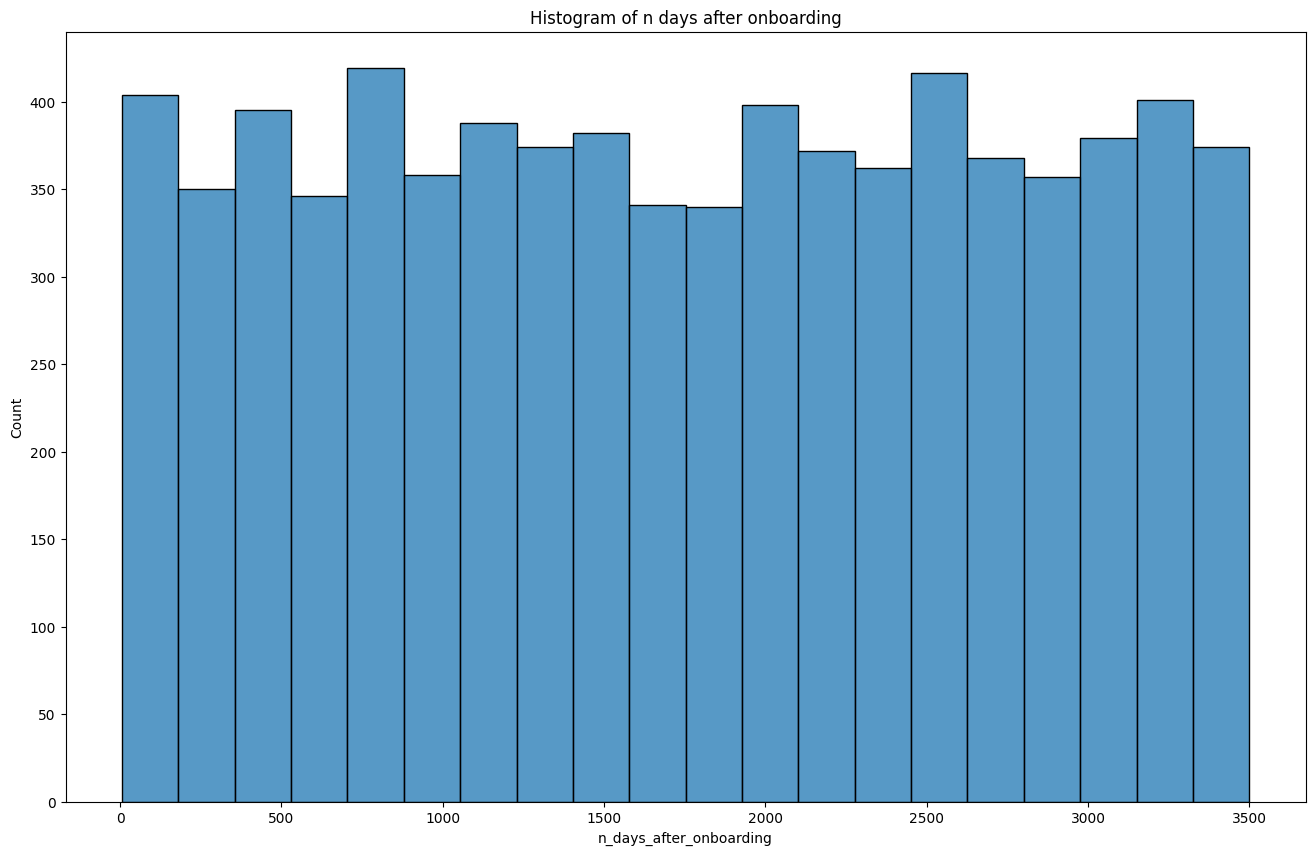

In [57]:
# Histogram
### YOUR CODE HERE ###
plt.figure(figsize = (16,10))
sns.histplot(data = df[df['percent_sessions_in_last_month'] >= 0.4], 
             x = 'n_days_after_onboarding')
plt.title('Histogram of n days after onboarding')
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

#### **Conclusion**

Analysis revealed that the overall churn rate is \~18%, and that this rate is consistent between iPhone users and Android users or users with or without favourite navigations.

There are some questions arise during the analysis that we must investigate. In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month and does the app has been measuring the kilometer driven last month incorrectly. And why the maximum number of days between activity_days and driving_days are different, one has 31 days while the other has 30.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.